In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (2).csv


In [ ]:
import pandas as pd
DF = pd.read_csv('spam.csv', encoding='ISO-8859-1')  # Try this
print(DF.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# **DATA** ***CLEANING***

In [ ]:
DF.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
print(DF.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [ ]:
print(DF.describe())


          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


In [ ]:
print(DF.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [ ]:
DF.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [ ]:
DF.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [ ]:
DF.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
DF['target'] = le.fit_transform(DF['target'])

# ***check for duplicates***

In [ ]:
DF.duplicated().sum()

403

In [ ]:
DF=DF.drop_duplicates(keep='first')

In [ ]:
DF.duplicated().sum()

0

In [ ]:
DF.shape

(5169, 2)

In [ ]:
DF['target'].value_counts()

,count
target,
0,4516
1,653


In [ ]:
# Add a new column for the number of words in each SMS message
DF['num_words'] = DF['text'].apply(lambda x: len(str(x).split()))


<ipython-input-95-ded4e5ac23c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['num_words'] = DF['text'].apply(lambda x: len(str(x).split()))


<ipython-input-96-3ac4cfc7b728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['message_length'] = DF['text'].apply(len)


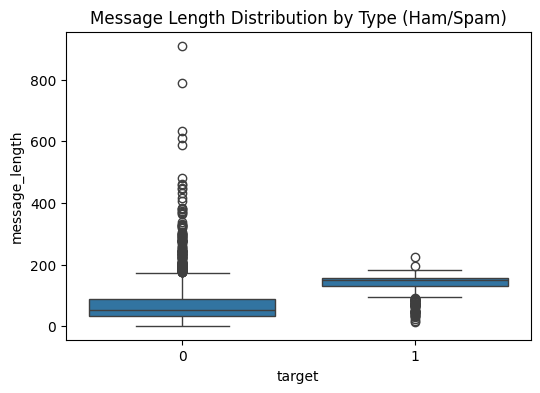

In [ ]:
DF['message_length'] = DF['text'].apply(len)
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='message_length', data=DF)
plt.title('Message Length Distribution by Type (Ham/Spam)')
plt.show()

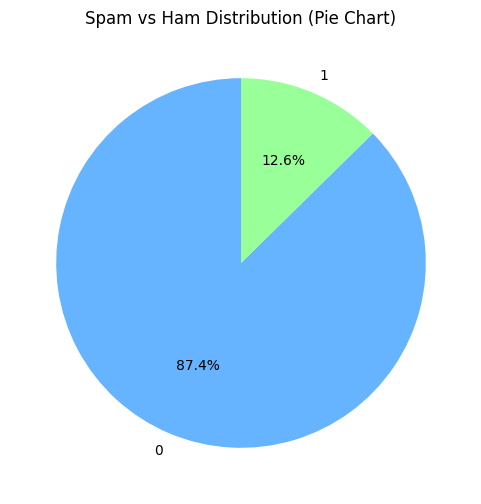

In [ ]:
plt.figure(figsize=(6, 6))
DF['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90)
plt.title('Spam vs Ham Distribution (Pie Chart)')
plt.ylabel('')
plt.show()


In [ ]:

# Add a new column for the number of sentences in each SMS message
DF['num_sentences'] = DF['text'].apply(lambda x: len(str(x).split('.')))


In [ ]:
DF[['num_sentences','message_length','num_words']].describe()

,num_sentences,message_length,num_words
count,5169.000000,5169.000000,5169.000000
mean,2.934030,78.977945,15.340685
std,2.541852,58.236293,11.068488
min,1.000000,2.000000,1.000000
25%,1.000000,36.000000,7.000000
50%,2.000000,60.000000,12.000000
75%,4.000000,117.000000,22.000000
max,42.000000,910.000000,171.000000


In [ ]:
DF[DF['target']==0][['num_sentences','message_length','num_words']].describe()

,num_sentences,message_length,num_words
count,4516.000000,4516.000000,4516.000000
mean,2.916519,70.459256,14.134632
std,2.638732,56.358207,11.116240
min,1.000000,2.000000,1.000000
25%,1.000000,34.000000,7.000000
50%,2.000000,52.000000,11.000000
75%,4.000000,90.000000,18.000000
max,42.000000,910.000000,171.000000


In [ ]:
DF[DF['target']==1][['num_sentences','message_length','num_words']].describe()

,num_sentences,message_length,num_words
count,653.000000,653.000000,653.000000
mean,3.055130,137.891271,23.681470
std,1.725848,30.137753,5.967672
min,1.000000,13.000000,2.000000
25%,2.000000,132.000000,22.000000
50%,3.000000,149.000000,25.000000
75%,4.000000,157.000000,28.000000
max,14.000000,224.000000,35.000000


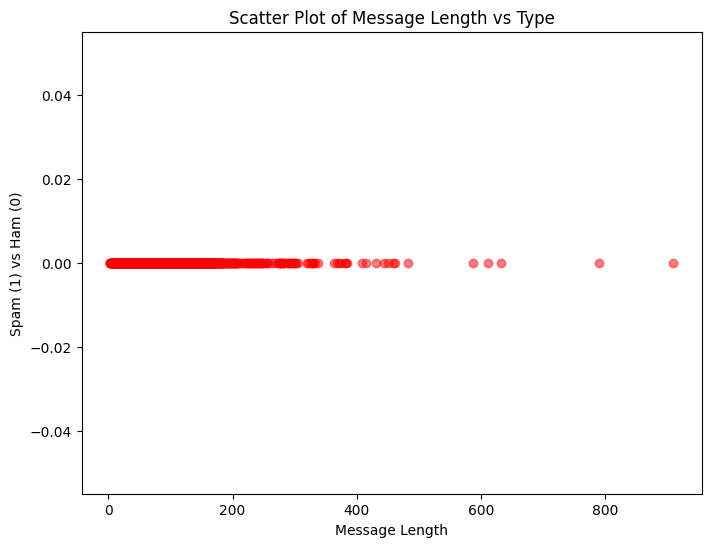

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(DF['message_length'], DF['target'].apply(lambda x: 1 if x == 'spam' else 0), alpha=0.5, color='red')
plt.title('Scatter Plot of Message Length vs Type')
plt.xlabel('Message Length')
plt.ylabel('Spam (1) vs Ham (0)')
plt.show()



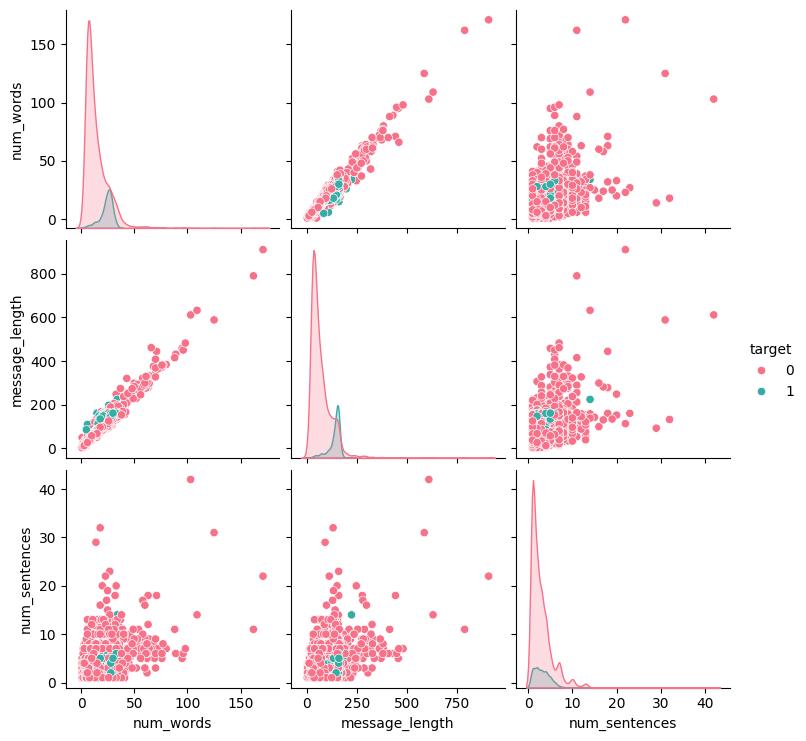

In [ ]:
sns.pairplot(DF, hue='target', palette='husl', diag_kind='kde')
plt.show()


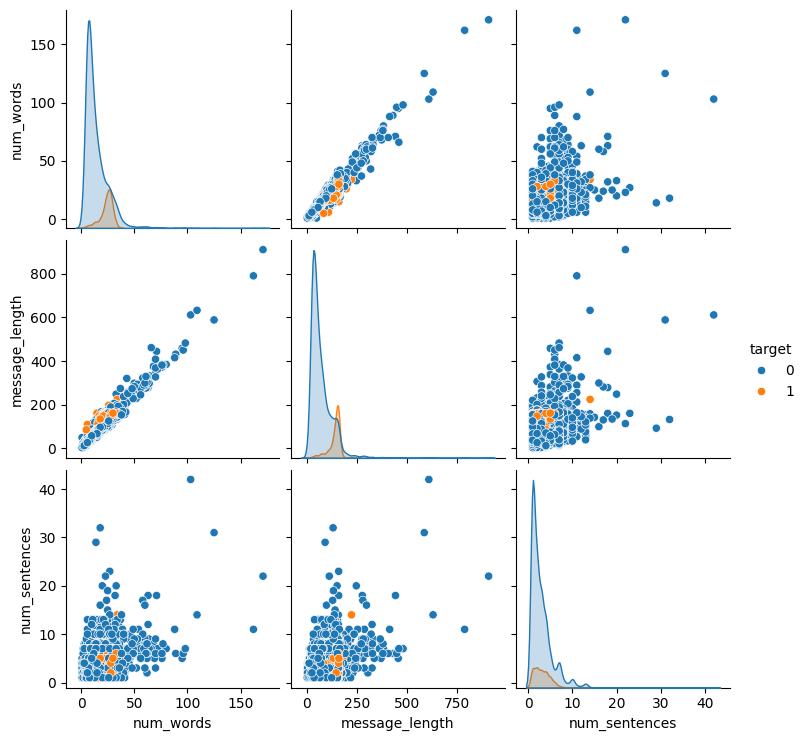

In [ ]:
sns.pairplot(DF, hue='target')
plt.show()

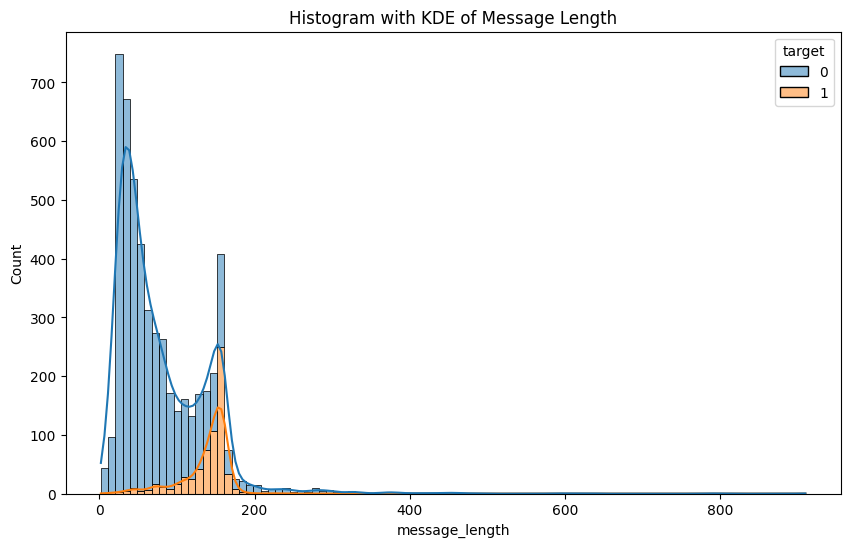

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=DF, x='message_length', hue='target', kde=True, multiple='stack')
plt.title('Histogram with KDE of Message Length')
plt.show()



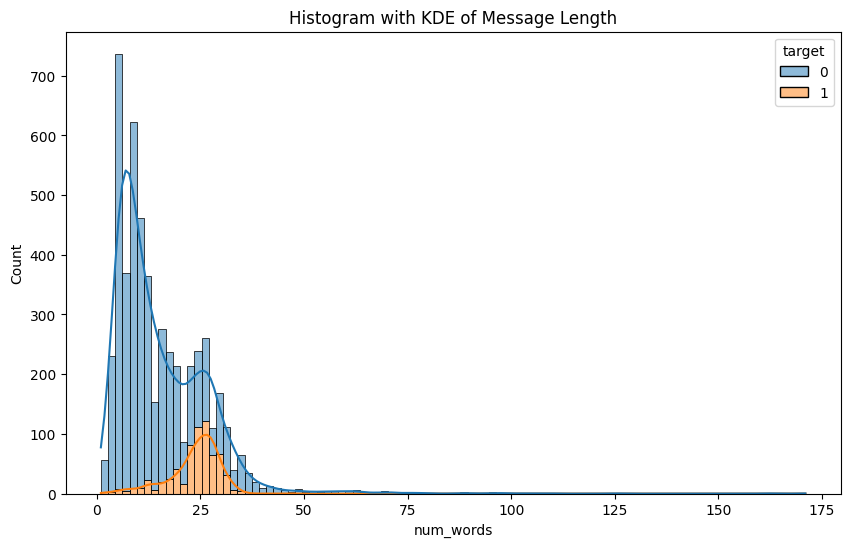

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=DF, x='num_words', hue='target', kde=True, multiple='stack')
plt.title('Histogram with KDE of Message Length')
plt.show()


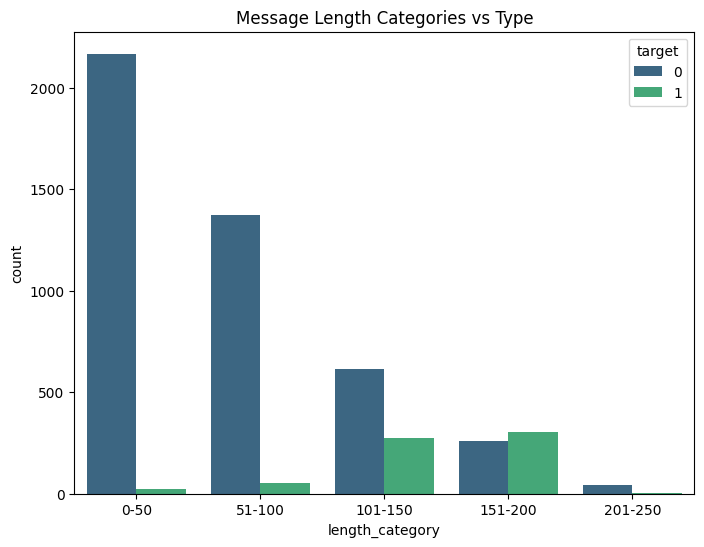

In [ ]:
DF['length_category'] = pd.cut(DF['message_length'], bins=[0, 50, 100, 150, 200, 250], labels=['0-50', '51-100', '101-150', '151-200', '201-250'])

plt.figure(figsize=(8, 6))
sns.countplot(x='length_category', hue='target', data=DF, palette='viridis')
plt.title('Message Length Categories vs Type')
plt.show()



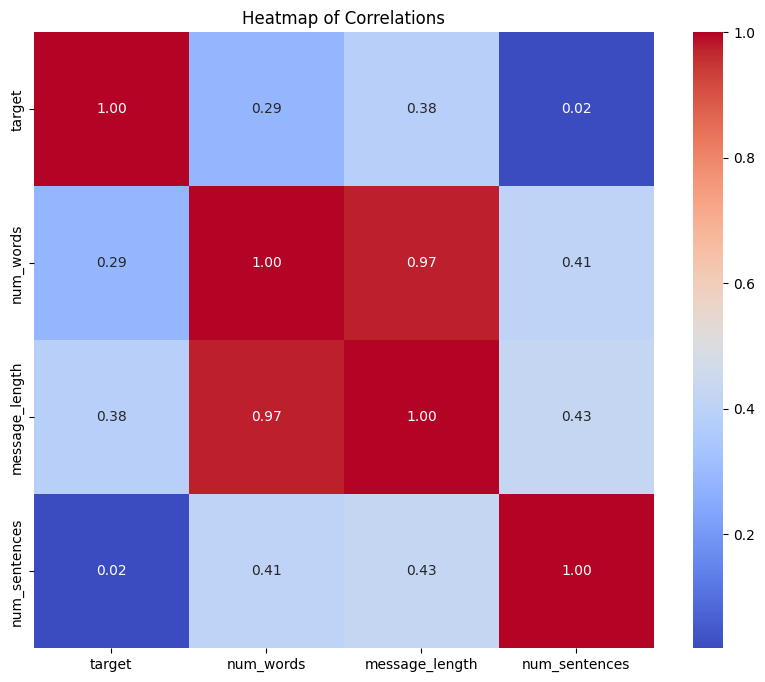

In [ ]:
# Select only numerical columns
numerical_df = DF.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()


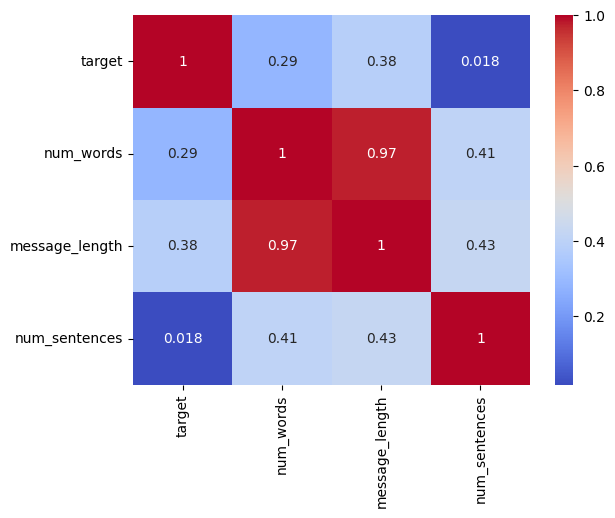

In [ ]:
df = DF.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

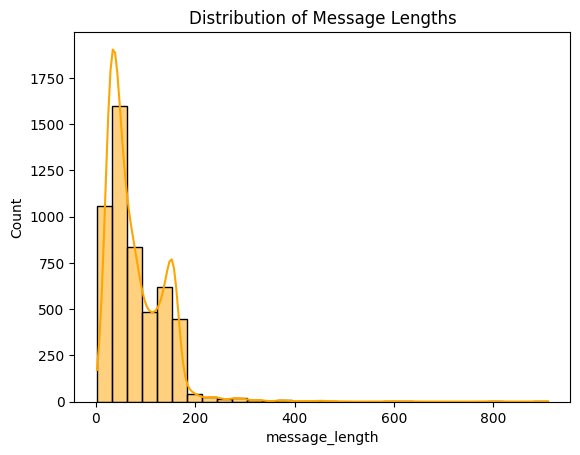

In [ ]:
sns.histplot(data=DF, x='message_length', bins=30, kde=True, color='orange')
plt.title('Distribution of Message Lengths')
plt.show()




In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words

In [ ]:
DF['transformed_text'] = DF['text'].str.lower()

In [ ]:
DF['transformed_text'] = DF['transformed_text'].apply(lambda x: x.split())

In [ ]:
DF['transformed_text'] = DF['transformed_text'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))


In [ ]:
DF['transformed_text'] = DF['transformed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [ ]:
DF.head()

,target,text,num_words,message_length,num_sentences,length_category,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,111,9,101-150,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,6,29,7,0-50,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2,151-200,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,11,49,7,0-50,u dun say early hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,1,51-100,nah dont think goes usf lives


In [ ]:
DF['transformed_text'] = DF['transformed_text'].apply(lambda x: str(x).split())


In [ ]:
from snowballstemmer import stemmer
english_stemmer = stemmer('english')

# Stem each word in the tokenized lists
DF['transformed_text'] = DF['transformed_text'].apply(lambda tokens: [english_stemmer.stemWord(word) for word in tokens])


In [ ]:
DF.drop('length_category', axis=1, inplace=True)

In [ ]:
DF.rename(columns={'messsage_length': 'num_character'}, inplace=True)

In [ ]:
DF.head()

,target,text,num_words,message_length,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,111,9,"[jurong, point, crazi, avail, bugi, n, great, ..."
1,0,Ok lar... Joking wif u oni...,6,29,7,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,11,49,7,"[u, dun, say, earli, hor, u, c, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",13,61,1,"[nah, dont, think, goe, usf, live]"


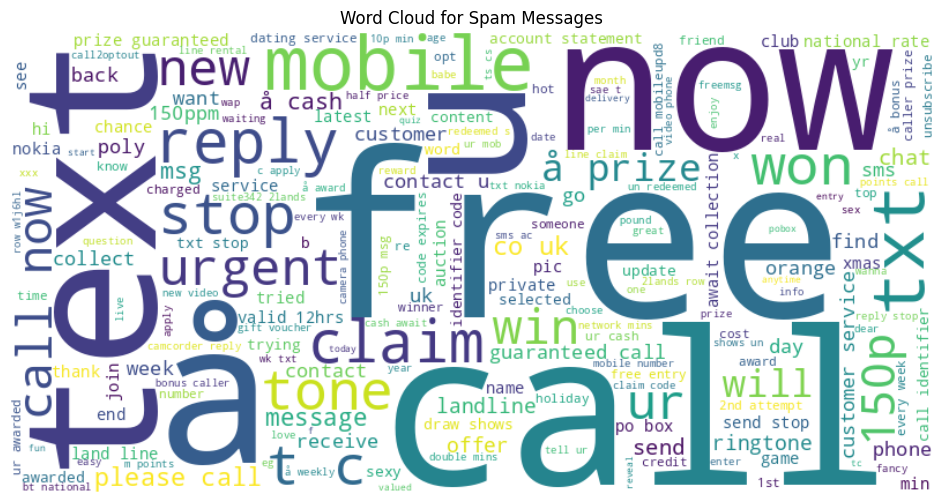

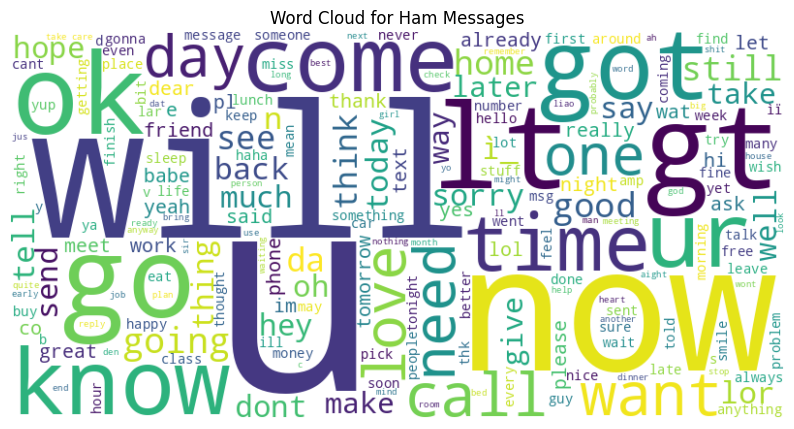

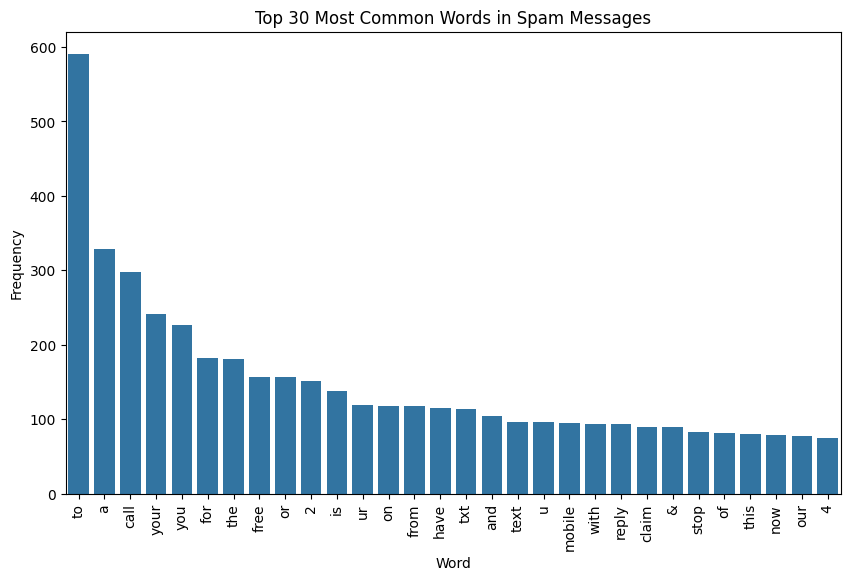

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import pandas as pd

# Assuming DF is your DataFrame containing the columns 'target' and 'text'

# Preprocess the text (optional but recommended for word cloud)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the 'text' column
DF['transformed_text'] = DF['text'].apply(preprocess_text)

# Create WordCloud for Spam Messages
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(
    DF[DF['target'] == 1]['transformed_text'].astype(str).str.cat(sep=' ')
)

# Create WordCloud for Ham Messages
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(
    DF[DF['target'] == 0]['transformed_text'].astype(str).str.cat(sep=' ')
)

# Plot the WordCloud for Spam Messages
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

# Plot the WordCloud for Ham Messages
plt.figure(figsize=(10, 6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

# Prepare a corpus for spam messages to calculate bigrams
spam_corpus = []
for msg in DF[DF['target'] == 1]['transformed_text']:
    spam_corpus.extend(str(msg).split())  # Split the text into words and extend the corpus

# Create a Counter object to count the frequency of words
word_counts = Counter(spam_corpus)

# Create a DataFrame from the word counts for top 30 words
top_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

# Plotting the top 30 most common words in spam messages
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=top_words_df)
plt.title('Top 30 Most Common Words in Spam Messages')
plt.xticks(rotation='vertical')
plt.show()


# **model building**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tf=TfidfVectorizer(max_features=3000)
cv=CountVectorizer()

In [ ]:
X=tf.fit_transform(DF['transformed_text']).toarray()

In [ ]:
print(DF.columns)


Index(['target', 'text', 'num_words', 'message_length', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [ ]:
X.shape

(5169, 3000)

In [ ]:
Y=DF['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
Gnb=GaussianNB()
Mnb=MultinomialNB()
Bnb=BernoulliNB()

In [ ]:
Gnb.fit(X_train,Y_train)
Y_pred1 = Gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8965183752417795
[[809  87]
 [ 20 118]]
0.5756097560975609


In [ ]:
Mnb.fit(X_train,Y_train)
Y_pred2 = Mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [ ]:
Bnb.fit(X_train,Y_train)
Y_pred3 = Bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9845261121856866
[[893   3]
 [ 13 125]]
0.9765625


In [ ]:
import pickle

# Save the model
with open('Mnb.pkl', 'wb') as model_file:
    pickle.dump(Mnb, model_file)


In [ ]:
!ls


 Mnb.pkl   sample_data	'spam (1).csv'	'spam (2).csv'	 spam.csv   vectorizer.pkl


In [ ]:
!pip install gradio


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(DF['text'])  # 'text' column contains your SMS data



In [ ]:
import pickle

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [ ]:
!ls


 Mnb.pkl   sample_data	'spam (1).csv'	'spam (2).csv'	 spam.csv   vectorizer.pkl


In [ ]:
# Load the vectorizer
with open('vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)


In [ ]:
import pickle

# Load the model
with open('Mnb.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)


In [ ]:
import re

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Prediction function
def predict_spam(message):
    transformed_message = preprocess_text(message)  # Preprocess the input
    vectorized_message = vectorizer.transform([transformed_message])  # Vectorize input
    result = model.predict(vectorized_message)[0]  # Predict
    return "Spam" if result == 1 else "Not Spam"


In [ ]:
import gradio as gr

# Define the prediction function
def predict_spam(message):
    transformed_message = preprocess_text(message)  # Preprocess the input
    vectorized_message = vectorizer.transform([transformed_message])  # Vectorize input
    result = model.predict(vectorized_message)[0]  # Predict
    return "🚫 Spam" if result == 1 else "✅ Not Spam"

# Enhanced interface with custom CSS for full-page design
with gr.Blocks() as interface:
    # Custom CSS for styling
    interface.css = """
    body {
        background: linear-gradient(to bottom right, #6a11cb, #2575fc);
        color: white;
        font-family: 'Arial', sans-serif;
    }
    #title {
        text-align: center;
        font-size: 40px;
        font-weight: bold;
        margin-top: 30px;
    }
    #description {
        text-align: center;
        font-size: 20px;
        margin-bottom: 30px;
        color: #e0e0e0;
    }
    #input-box {
        background-color: #ffffff;
        border: 2px solid #4CAF50;
        color: black;
        font-size: 18px;
        padding: 10px;
        border-radius: 8px;
    }
    #output-box {
        background-color: #ffffff;
        border: 2px solid #f44336;
        color: black;
        font-size: 18px;
        padding: 10px;
        border-radius: 8px;
    }
    #submit-button {
        background-color: #ff5722;
        color: white;
        font-size: 20px;
        padding: 10px 20px;
        border-radius: 8px;
        border: none;
        cursor: pointer;
    }
    #submit-button:hover {
        background-color: #e64a19;
    }
    footer {
        text-align: center;
        margin-top: 40px;
        font-size: 16px;
        color: #e0e0e0;
    }
    """

    gr.Markdown("<div id='title'>📱 SMS Spam Detector</div>")
    gr.Markdown(
        "<div id='description'>Enter your message below to find out if it’s spam or not.</div>"
    )

    with gr.Row():
        with gr.Column():
            input_box = gr.Textbox(
                label="Your SMS Message:",
                placeholder="Type your message here...",
                lines=5,
                interactive=True,
                elem_id="input-box",
            )
        with gr.Column():
            output_box = gr.Textbox(
                label="Prediction Result:",
                interactive=False,
                elem_id="output-box",
            )

    with gr.Row():
        submit_button = gr.Button("🔍 Check Spam", elem_id="submit-button")

    submit_button.click(predict_spam, inputs=input_box, outputs=output_box)

    gr.Markdown(
        "<footer><i>Made with ❤️ using Gradio. Your SMS model at work!</i></footer>"
    )

# Launch the app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://80cdd47ab435583e57.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
